In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as sig

In [2]:
# Generate some random white noise first.
N = 100000
z = np.random.randn(N)

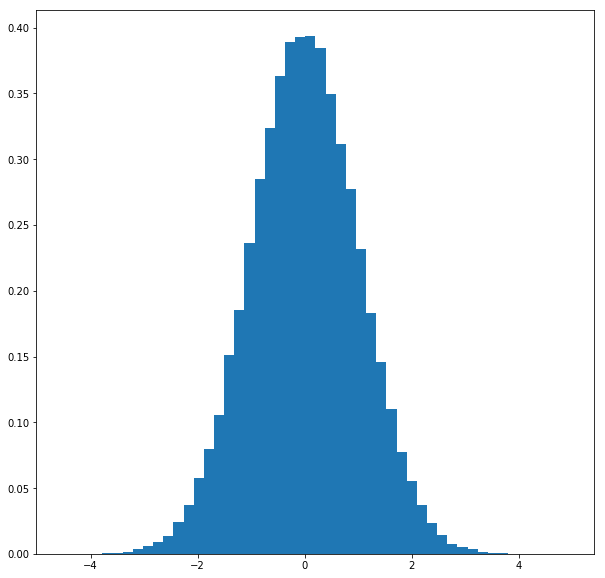

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(z, bins=50, normed=True);

In [4]:
spectrum = np.fft.fft(z)
t = np.arange(N)
f = np.fft.fftshift(np.fft.fftfreq(N))

noiseP = np.sum(np.abs(spectrum)**2)
print (noiseP)

9922060491.178621


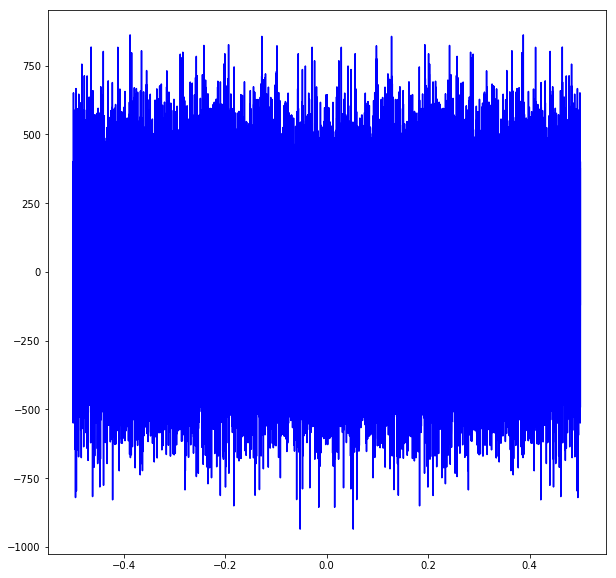

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(f, np.real(spectrum), 'b');

In [21]:
def flicker(f, z):
    window = 1/f**0.5
    y = z*window
    noiseP = np.sum(np.abs(z)**2)
    newnoiseP = np.sum(np.abs(y)**2)
    return y*np.sqrt(noiseP/newnoiseP)

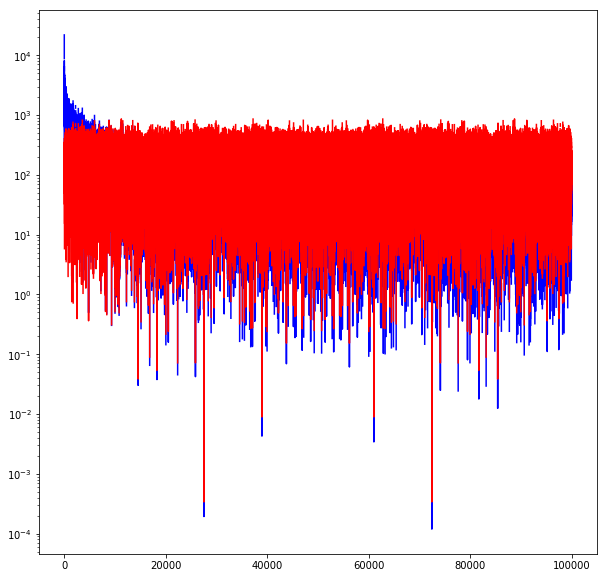

In [22]:
cnoise = flicker(t+1, spectrum)
fig, ax = plt.subplots(figsize=(10,10))
ax.semilogy(t+1, np.real(cnoise), 'b')
ax.semilogy(t+1, np.real(spectrum), 'r');

In [23]:
colored = np.real(np.fft.ifft(cnoise))

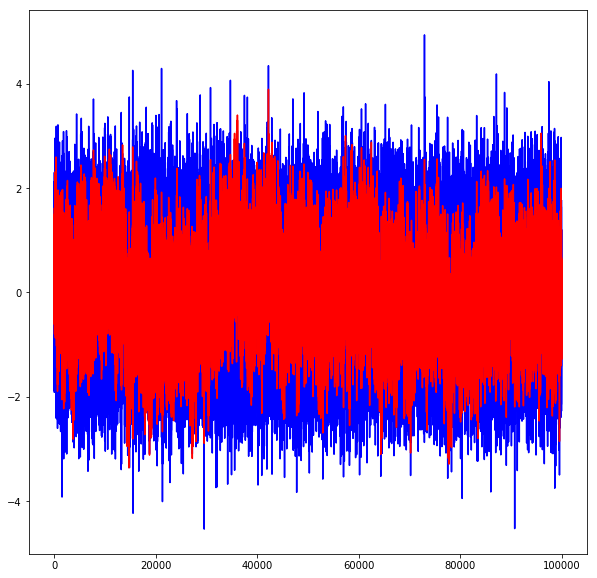

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t, z, 'b')
ax.plot(t, colored, 'r');
# ax.set_xlim((0,10000));

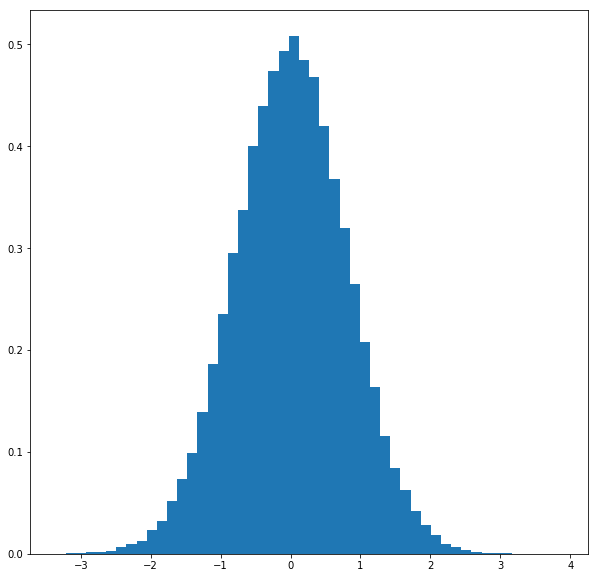

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(colored, bins=50, normed=True);